## IV. Optical Traps


Marc Rodriguez Salazar

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# values

R = 1e-6 # radius (m)
T= 300 # temperature (K)
eta= 0.001 # viscosity (Nsm^-2)
tau= 0.6e-6 # momentum relaxation time (s)
gamma= 6*np.pi*eta*R # friction coefficient (kg/s)

KB= 1.38e-23 # Boltzmann cnt (J/K)

D= KB*T/gamma # diffusion coefficient (m^2/s)

kx=1e-6 # stiffnesses of the trap (N/m)
ky=1e-6 # stiffnesses of the trap (N/m)
kz=0.2e-6 # stiffnesses of the trap (N/m)

#### Trajectory of a Brownian particle in an optical trap

In [3]:
Dt=1e-3 # time step (s)

In [4]:
N = int(1e+3)

In [5]:
x= np.zeros(N)
x[0] = 0

wx = np.random.normal(0, 1, N)

for i in range(1, N):
    x[i]=x[i-1] -1/gamma *kx* Dt* x[i-1] + np.sqrt(2*D*Dt)*wx[i]

In [6]:
y= np.zeros(N)
y[0] = 0

wy = np.random.normal(0, 1, N)

for i in range(1, N):
    y[i]=y[i-1] -1/gamma *ky* Dt* y[i-1] + np.sqrt(2*D*Dt)*wy[i]

In [7]:
z= np.zeros(N)
z[0] = 0

wz = np.random.normal(0, 1, N)

for i in range(1, N):
    z[i]=z[i-1] -1/gamma *kz* Dt* z[i-1] + np.sqrt(2*D*Dt)*wz[i]

In [8]:
from mpl_toolkits.mplot3d import Axes3D

In [9]:
x_nm= x*1e9
y_nm= y*1e9
z_nm= z*1e9

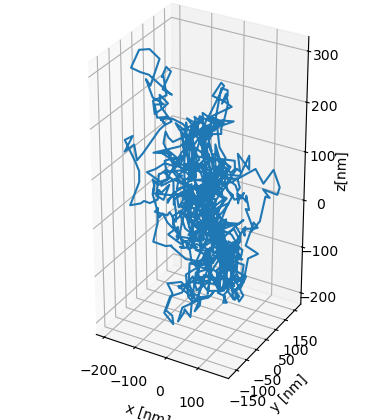

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(x_nm, y_nm, z_nm)

# Etiquetas para los ejes
ax.set_xlabel('x [nm]')
ax.set_ylabel('y [nm]')
ax.set_zlabel('z[nm]')

ax.set_box_aspect([1, 1, 2])

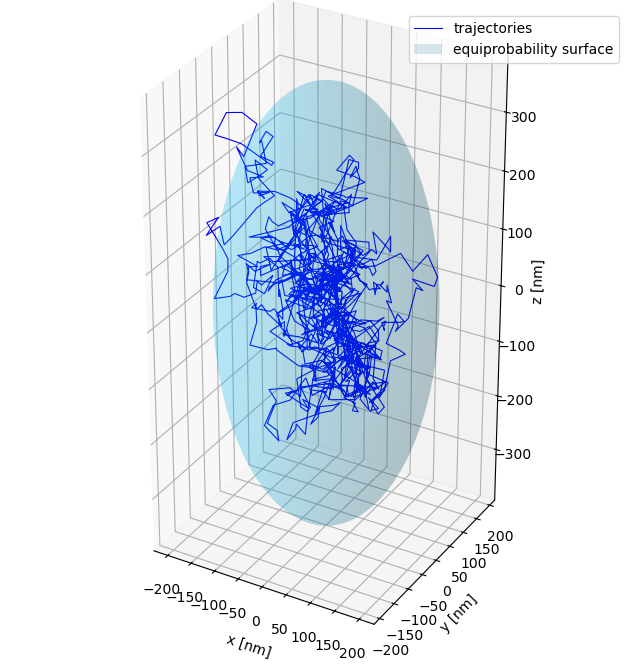

In [11]:
sigma=1.2

rx = sigma*np.max(x_nm)
ry = sigma*np.max(y_nm)
rz = sigma*np.max(z_nm)

u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)

x_ell = rx * np.outer(np.cos(u), np.sin(v))
y_ell = ry * np.outer(np.sin(u), np.sin(v))
z_ell = rz * np.outer(np.ones_like(u), np.cos(v))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# trajectories
ax.plot3D(x_nm, y_nm, z_nm, color='blue',linewidth=0.8, label='trajectories')

# equiprobability surface
ax.plot_surface(x_ell, y_ell, z_ell, color='deepskyblue', alpha=0.15, linewidth=0, label='equiprobability surface')

# graph
ax.set_xlabel('x [nm]')
ax.set_ylabel('y [nm]')
ax.set_zlabel('z [nm]')
ax.set_box_aspect([1, 1, 2])
ax.legend()

plt.show()

#### Probability distributions of finding the particle in the z- and y-planes

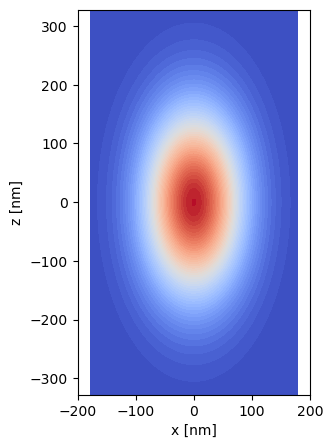

In [12]:
rx = np.std(x_nm)  # std x
rz = np.std(z_nm)  # std z

x_vals = np.linspace(-3*rx, 3*rx, 100)
z_vals = np.linspace(-3*rz, 3*rz, 100)

X, Z = np.meshgrid(x_vals, z_vals)

P_zx = (1 / (2 * np.pi * rx * rz)) * np.exp(-0.5 * (X**2 / rx**2 + Z**2 / rz**2))
#P_zx_normalized = (P_zx - np.min(P_zx)) / (np.max(P_zx) - np.min(P_zx))

# graph
fig = plt.figure(figsize=(3, 5))
ax = fig.add_subplot(111)

cp = ax.contourf(X, Z, P_zx, 50, cmap='coolwarm')
#fig.colorbar(cp)  

#ax.set_aspect(1) 
ax.set_xlabel('x [nm]')
ax.set_xlim(-200,200)
ax.set_ylabel('z [nm]')

plt.show()

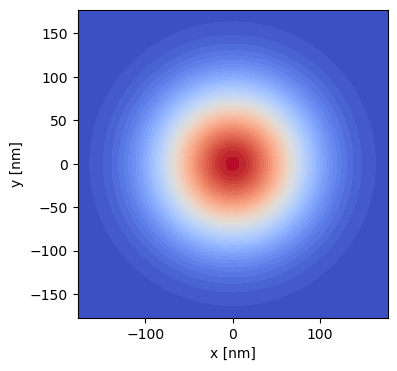

In [13]:
rx = np.std(x_nm)  # std x
ry = np.std(y_nm)  # std y

x_vals = np.linspace(-3*rx, 3*rx, 100)
y_vals = np.linspace(-3*ry, 3*ry, 100)

X, Y = np.meshgrid(x_vals, y_vals)

P_yx = (1 / (2 * np.pi * rx * ry)) * np.exp(-0.5 * (X**2 / rx**2 + Y**2 / ry**2))
#P_yx_normalized = (P_yx - np.min(P_yx)) / (np.max(P_yx) - np.min(P_yx))

# graph
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)

cp = ax.contourf(X, Y, P_yx, 50, cmap='coolwarm')
#fig.colorbar(cp)  

ax.set_xlabel('x [nm]')
ax.set_ylabel('y [nm]')

plt.show()

#### Confinement as a function of trap stiffness

In [14]:
# simulations

In [15]:
Dt = 1e-3  # time step (s)
N = int(1e+4)  

In [16]:
kxy_values = [0.1e-6, 0.2e-6, 0.5e-6, 1e-6,2e-6,3e-6, 4e-6, 5e-6,6e-6,7e-6,8e-6,9e-6]

In [17]:
var=[]
for i, kxy in enumerate(kxy_values):
    x = np.zeros(N)
    y = np.zeros(N)
    wx = np.random.normal(0, 1, N)
    wy = np.random.normal(0, 1, N)
    
    for j in range(1, N):
        x[j] = x[j-1] - 1/gamma * kxy * Dt * x[j-1] + np.sqrt(2*D*Dt) * wx[j]
        y[j] = y[j-1] - 1/gamma * kxy * Dt * y[j-1] + np.sqrt(2*D*Dt) * wy[j]
    
    var_xy = np.std(y)**2+np.std(x)**2
    var.append(var_xy)

In [18]:
# theoretical

In [19]:
space = np.linspace(0.1e-6, 10e-6, 100)

In [20]:
var_sim =np.array(var)*1e18

In [21]:
var_th=1/space
var_th=var_th*1e-2

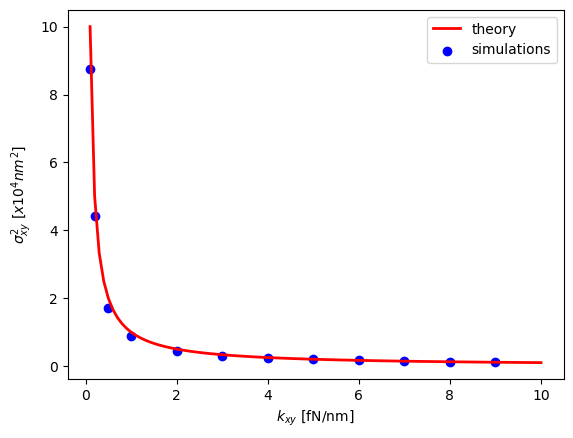

In [22]:
plt.plot(space*1e6, var_th/1e4 , 'r-', label='theory', linewidth=2)
plt.scatter(np.array(kxy_values)*1e6, var_sim/1e4, color='b', label='simulations')

plt.xlabel(r'$k_{xy}$ [fN/nm]')
plt.ylabel("$\sigma_{xy}^{2}$ $[x10^{4} nm^{2}]$")

plt.legend()

In [23]:
kxy_values = [0.2e-6, 1e-6, 5e-6]

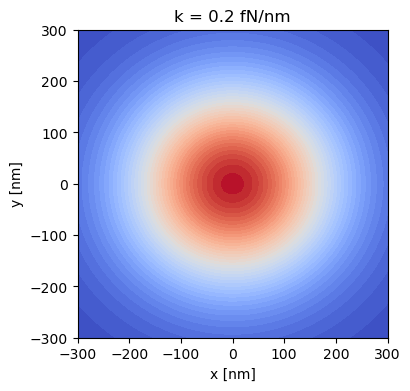

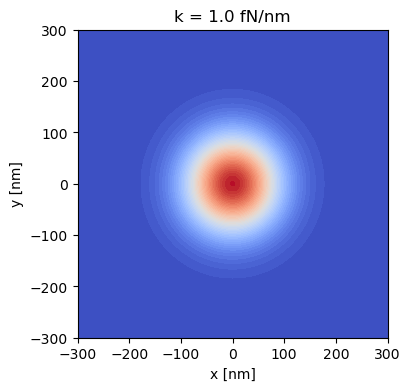

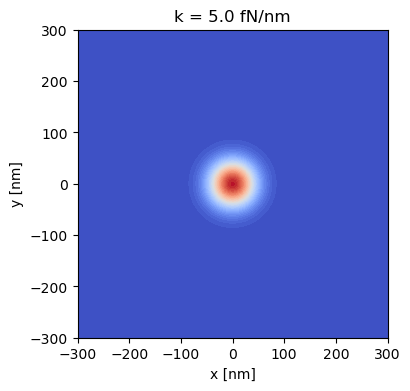

In [24]:
for i, kxy in enumerate(kxy_values):
    x = np.zeros(N)
    y = np.zeros(N)
    wx = np.random.normal(0, 1, N)
    wy = np.random.normal(0, 1, N)
    
    for j in range(1, N):
        x[j] = x[j-1] - 1/gamma * kxy * Dt * x[j-1] + np.sqrt(2*D*Dt) * wx[j]
        y[j] = y[j-1] - 1/gamma * kxy * Dt * y[j-1] + np.sqrt(2*D*Dt) * wy[j]
    
    rx = np.std(x)  # std x
    ry = np.std(y)  # std y
    
    x_vals = np.linspace(-10*rx, 10*rx, 300)
    y_vals = np.linspace(-10*ry, 10*ry, 300)

    X, Y = np.meshgrid(x_vals, y_vals)

    P_yx = (1 / (2 * np.pi * rx * ry)) * np.exp(-0.5 * (X**2 / rx**2 + Y**2 / ry**2))

    # graph
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111)

    cp = ax.contourf(X*1e9, Y*1e9, P_yx, 50, cmap='coolwarm')

    ax.set_xlabel('x [nm]')
    ax.set_xlim([-300, 300])
    ax.set_ylabel('y [nm]')
    ax.set_ylim([-300, 300])
    ax.set_title(f'k = {round(kxy / 1e-6, 2)} fN/nm')
    plt.show()

#### Velocity autocorrelation function

In [25]:
N = int(1e+5) 

In [26]:
def acf(x, Dt):

    r_full = np.correlate(x, x, mode='full') / len(x)
    
    mid = len(r_full) // 2  # the mean value corresponds to t=0
    
    
    r = r_full / np.max(np.abs(r_full))  # normalize to 1

    t = Dt * (np.arange(-mid, mid + 1))  # time goes from -t_max a +t_max
    
    return r, t

In [27]:
kxy_values = [0.2e-6, 1e-6, 5e-6]

In [28]:
Dt=1e-3 # time step (s)

In [29]:
r_values = [] 
t_values= []

for i, kxy in enumerate(kxy_values):
    x = np.zeros(N)
    wx = np.random.normal(0, 1, N)
    
    for j in range(1, N):
        x[j] = x[j-1] - 1/gamma * kxy * Dt * x[j-1] + np.sqrt(2*D*Dt) * wx[j]

    r, time = acf(x, Dt)
    r_values.append(r)    
    t_values.append(time) 

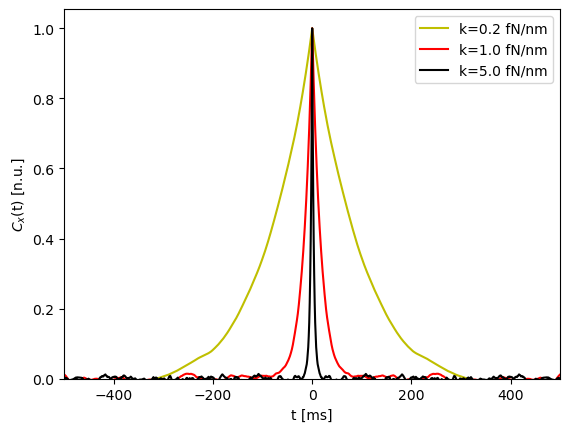

In [30]:
plt.plot(t_values[0]*1000, r_values[0], 'y-', label=f'k={round(kxy_values[0] / 1e-6, 2)} fN/nm')
plt.plot(t_values[1]*1000, r_values[1], 'r-', label=f'k={round(kxy_values[1] / 1e-6, 2)} fN/nm')
plt.plot(t_values[2]*1000, r_values[2], 'k-', label=f'k={round(kxy_values[2] / 1e-6, 2)} fN/nm')

plt.ylim(0)
plt.xlim(-500,500)
plt.xlabel('t [ms]')
plt.ylabel(r'$C_x$(t) [n.u.]')
plt.legend()

#### Mean square displacement

In [31]:
def MSD(x, Dt):
    x = np.array(x)
    max_n = int(np.sqrt(len(x)))

    msd = []

    for n in range(max_n + 1):
        displacements = x[n:] - x[:len(x) - n]
        squared_displacements = displacements**2
        msd.append(np.mean(squared_displacements))

    t = Dt * np.arange(len(msd))
    
    return msd, t

In [32]:
kxy_values = [0.2e-6, 1e-6, 5e-6]

In [33]:
Dt=1e-3 # time step (s)

In [34]:
MSD_values = [] 
t_values= []

for i, kxy in enumerate(kxy_values):
    x = np.zeros(N)
    wx = np.random.normal(0, 1, N)
    
    for j in range(1, N):
        x[j] = x[j-1] - 1/gamma * kxy * Dt * x[j-1] + np.sqrt(2*D*Dt) * wx[j]

    mean_square_displacement, time = MSD(x, Dt)
    MSD_values.append(mean_square_displacement)    
    t_values.append(time) 

In [35]:
MSD_values=np.array(MSD_values)*1e18

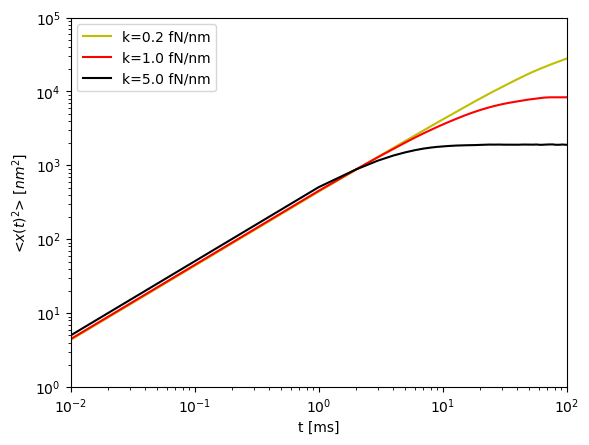

In [36]:
plt.plot(t_values[0]*1000, MSD_values[0], 'y-', label=f'k={round(kxy_values[0] / 1e-6, 2)} fN/nm')
plt.plot(t_values[1]*1000, MSD_values[1], 'r-', label=f'k={round(kxy_values[1] / 1e-6, 2)} fN/nm')
plt.plot(t_values[2]*1000, MSD_values[2], 'k-', label=f'k={round(kxy_values[2] / 1e-6, 2)} fN/nm')

plt.xlabel('t [ms]')
plt.xscale('log')

plt.ylabel(r'<$x(t)^2$> [$nm^2$]')
plt.yscale('log')
plt.xlim(1e-2, 1e2)
plt.ylim(1e0, 1e5)


plt.legend()